# **HW-4**



In [1]:
import numpy as np
import PIL
#from scipy.misc.pilutil import imread
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.mixture import GaussianMixture
import cv2
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

import seaborn as sns
import pandas.util.testing as tm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

os.getcwd()
directory = "/content/drive/My Drive/Colab Notebooks"
os.chdir(directory)
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Copy of Bandit Algorithms.ipynb',
 'MABP Bayesian Approach.ipynb',
 '3096_colorPlane.jpg',
 '42049_colorBird.jpg',
 'UML HW.ipynb']

# **PCA**

In [0]:

def processing(image):
  img = cv2.imread(image)
  print("Image shape:",img.shape)
  pix_val = np.reshape(img,(154401,3))
  vertical_cord = np.hstack((np.full((481,),i) for i in range(img.shape[0])))
  horizontal_cord = np.array([])
  for i in range(img.shape[0]):
    horizontal_cord = np.append(horizontal_cord, list(range(img.shape[1])))
  picture = pd.DataFrame({'vertical': vertical_cord,
                        'horizontal': horizontal_cord,
                        'red':pix_val[:,0],
                        'green':pix_val[:,1],
                        'blue':pix_val[:,2]})
  min_max_scaler = preprocessing.MinMaxScaler()
 
  picture = pd.DataFrame(min_max_scaler.fit_transform(picture), index=picture.index, columns=picture.columns)
  return picture

def pc_decomposition(picture):
  

  pca = PCA(5)
  model = pca.fit_transform(picture)
  #pca.explained_variance_ratio_ 
  pc_df = pd.DataFrame(data = model , 
        columns = ['PC1', 'PC2','PC3','PC4','PC5'])
  
  df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']})
  return df, pc_df



  

In [3]:
plane = processing('3096_colorPlane.jpg') 
bird = processing('42049_colorBird.jpg')
df_palne, pc_df_palne = pc_decomposition(plane)
df_bird, pc_df_bird = pc_decomposition(bird)

Image shape: (321, 481, 3)
Image shape: (321, 481, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


# SCREE PLOT

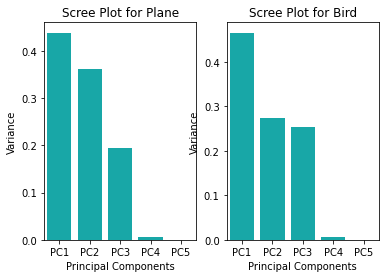

In [4]:


fig, ax =plt.subplots(1,2)
sns.barplot(x='PC',y="var", 
           data=df_palne, color="c", ax=ax[0]).set(title = 'Scree Plot for Plane', xlabel = 'Principal Components', ylabel = 'Variance')

sns.barplot(x='PC',y="var", 
           data=df_bird, color="c",ax=ax[1]).set(title = 'Scree Plot for Bird', xlabel = 'Principal Components', ylabel = 'Variance')


plt.show()



3d is resonable to represent bird and plane image <br>


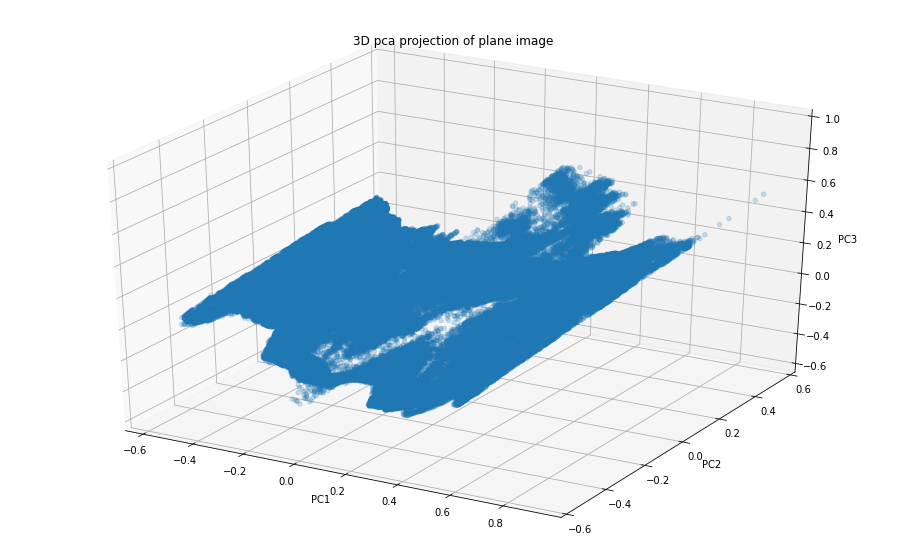

In [5]:

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pc_df_palne['PC1'], 
    ys=pc_df_palne['PC2'] , 
    zs=pc_df_palne['PC3'], 
    alpha = 0.2,
    cmap='tab10',
   
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D pca projection of plane image")
plt.show()

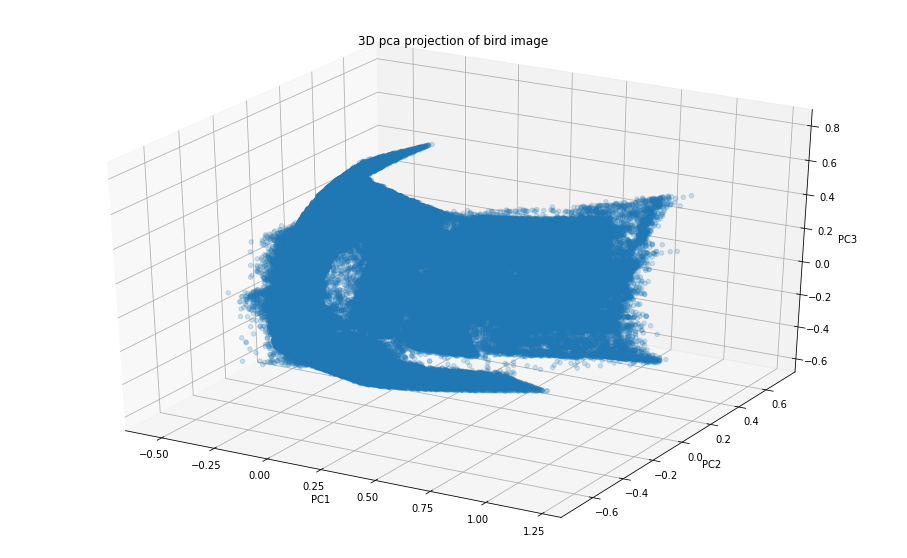

In [6]:

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pc_df_bird['PC1'], 
    ys=pc_df_bird['PC2'] , 
    zs=pc_df_bird['PC3'], 
    alpha = 0.2,
    cmap='tab10',
   
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D pca projection of bird image")
plt.show()

# **TSNE**

In [0]:
def tsne(picture, perplexity):
  picture = picture.sample(frac =.25, random_state = 1021)
  tsne = TSNE(n_components=2, perplexity= perplexity, n_iter=300)
  tsne_results = tsne.fit_transform(picture)
  ts_df = pd.DataFrame(data = tsne_results , 
        columns = ['TSNE1', 'TSNE2'])
  sns.scatterplot(
      x="TSNE1", y="TSNE2",
      data=ts_df,
      alpha=0.3
  ).set(title = 'At perplexity: {}'.format(perplexity))
 

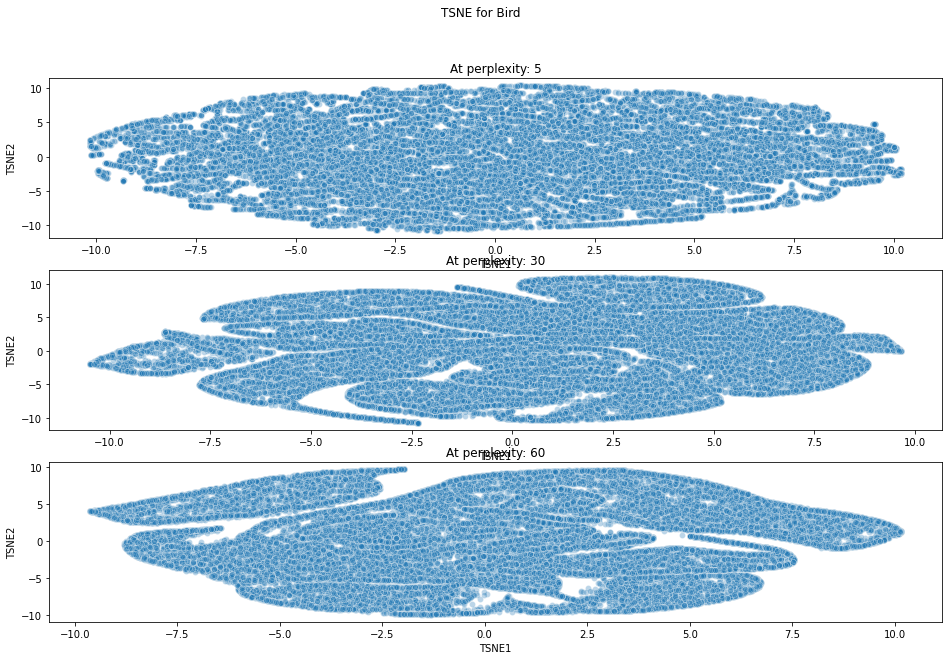

In [98]:

fig = plt.figure(figsize=(16,10))
plt.suptitle('TSNE for Bird')

plt.subplot(3, 1, 1,)
tsne(bird,5)

#fig = plt.figure(figsize=(16,10))
plt.subplot(3, 1, 2)
tsne(bird,30)

#fig = plt.figure(figsize=(16,10))
plt.subplot(3, 1, 3)
tsne(bird,60)

plt.show()

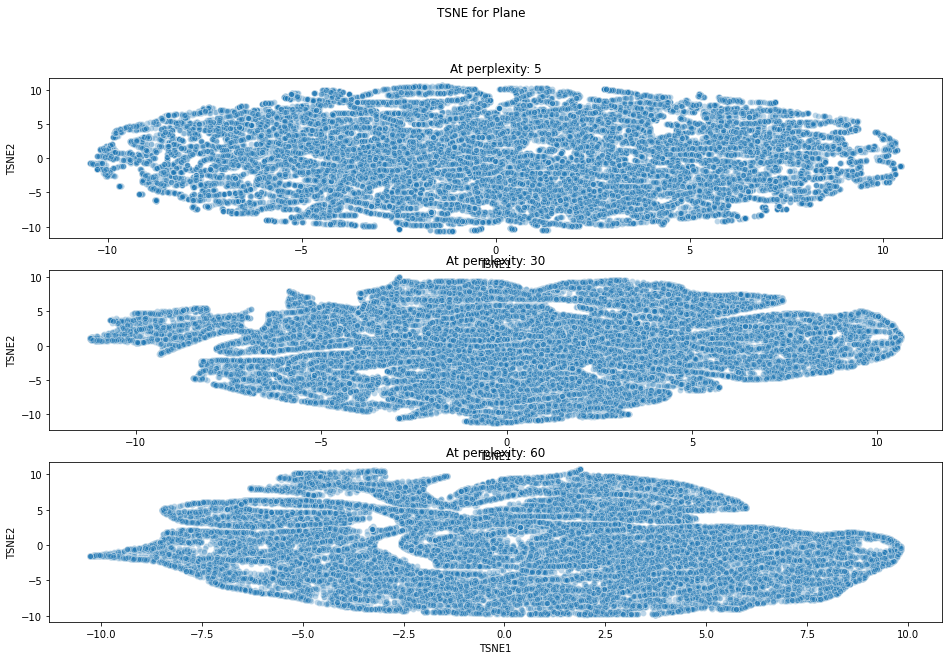

In [99]:

fig = plt.figure(figsize=(16,10))
plt.suptitle('TSNE for Plane')

plt.subplot(3, 1, 1,)
tsne(plane,5)

#fig = plt.figure(figsize=(16,10))
plt.subplot(3, 1, 2)
tsne(plane,30)

#fig = plt.figure(figsize=(16,10))
plt.subplot(3, 1, 3)
tsne(plane,60)

plt.show()

We observe a tendency towards clearer shapes as the perplexity value increases. <br>
Number of iterations also matters to reach a stable configuration. <br>
Here i used contant 300 iterations by changing perplexities. <br>
It is also noted that perplexity should be less than total number of points else there will be unexpected behaviour in image.

# **HW-5**

# **K-Means**

In [0]:
def Clustering(picture,k):
 
  km = KMeans(k)
  picture = picture.sample(frac =.25, random_state = 1021)
  y = km.fit_predict(picture)
  labels =  km.labels_
  ch = calinski_harabasz_score(picture, labels)

  #y2 = km.fit_predict(picture)
  #labels2 =  km.labels_
  
  sh = silhouette_score(picture, labels)
  plt.scatter(picture.iloc[:,1],-picture.iloc[:,0], c = labels)
  plt.title('K-Means with clusters: {} \n ch-score: {} \n sh-score: {}'.format(k,round(ch,2), round(sh,2)))
  plt.axis('off')




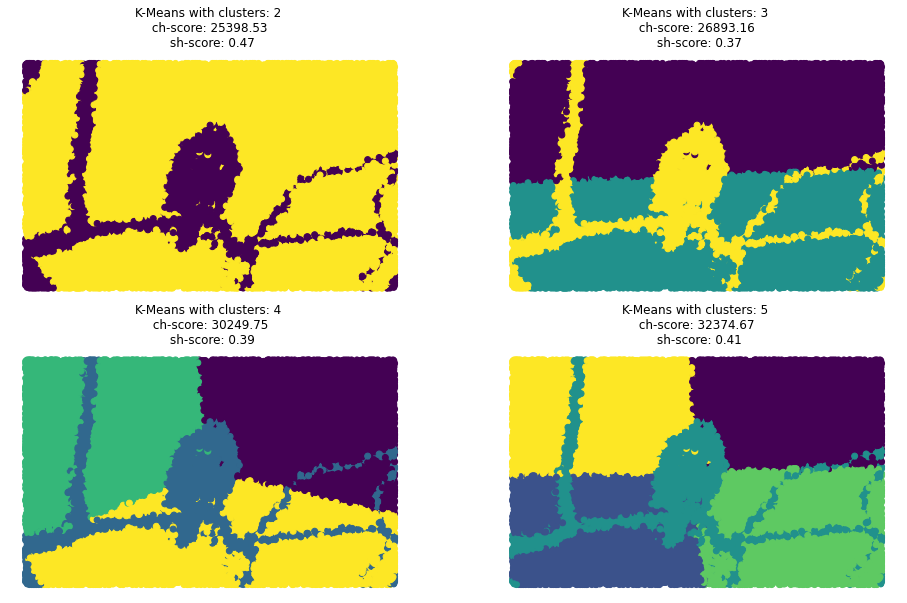

In [8]:

fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
Clustering(bird,2)

plt.subplot(2, 2, 2)
Clustering(bird,3)

plt.subplot(2, 2, 3)
Clustering(bird,4)

plt.subplot(2, 2, 4)
Clustering(bird,5)

plt.show()

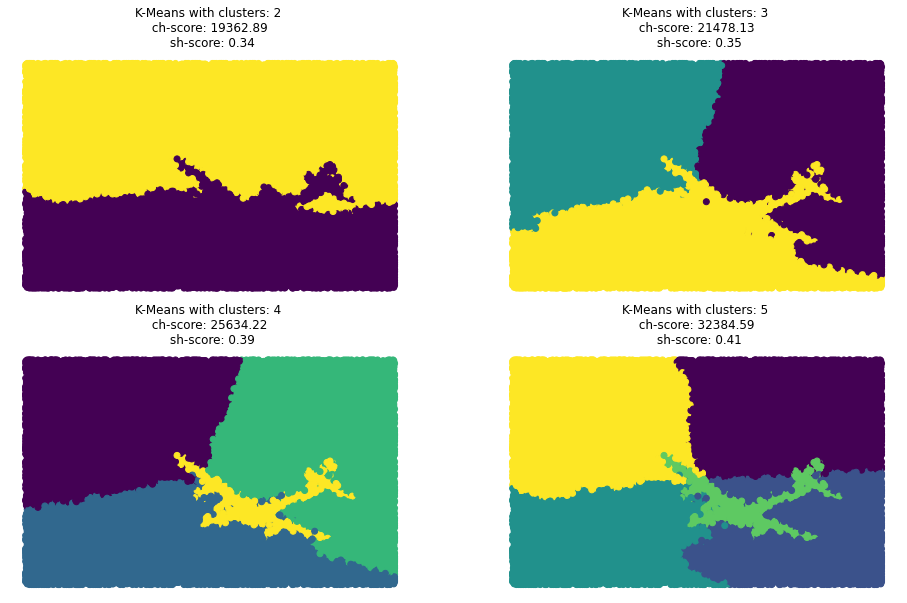

In [9]:

fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
Clustering(plane,2)

plt.subplot(2, 2, 2)
Clustering(plane,3)

plt.subplot(2, 2, 3)
Clustering(plane,4)

plt.subplot(2, 2, 4)
Clustering(plane,5)

plt.show()

In K-Mean, <br>
For Bird, 2 clusters resulting in good segmentation <br>
For Plane, 4 & 5 clusters resulting in good segmentation<br>

In [0]:
def tsne2(picture):
  picture = picture.sample(frac =.25, random_state = 1021)
  tsne = TSNE(n_components=2, perplexity= 30, n_iter=300)
  tsne_results = tsne.fit_transform(picture)
  ts_df = pd.DataFrame(data = tsne_results , 
        columns = ['TSNE1', 'TSNE2'])
  return ts_df
tsne_df_plane = tsne2(plane)
tsne_df_bird = tsne2(bird)

In [0]:
def tsne_km_clustering(picture,k):
  km = KMeans(k)
  y = km.fit_predict(picture)
  labels =  km.labels_
  g = sns.scatterplot(
      x="TSNE1", y="TSNE2",
      data=picture,
      alpha=0.3,  
      hue = labels
  )
  g.legend_.remove()
  plt.title('TSNE  with clusters {}'.format(k))
  plt.show()
def pca_km_clustering(picture, k):
  km = KMeans(k)
  y = km.fit_predict(picture)
  labels =  km.labels_
  ax = plt.figure(figsize=(10,7)).gca(projection='3d')
  ax.scatter(
    xs=picture['PC1'], 
    ys=picture['PC2'] , 
    zs=picture['PC3'], 
    
    c= labels

  )
  plt.title('PCA  with clusters {}'.format(k))
  plt.show()


######################## BIRD #######################


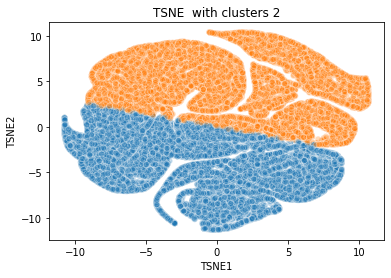

######################## PLANE ######################


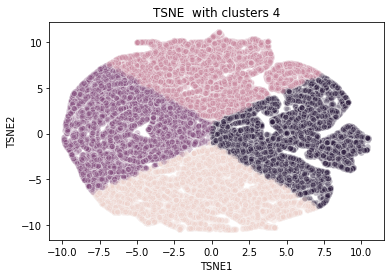

######################## BIRD #######################


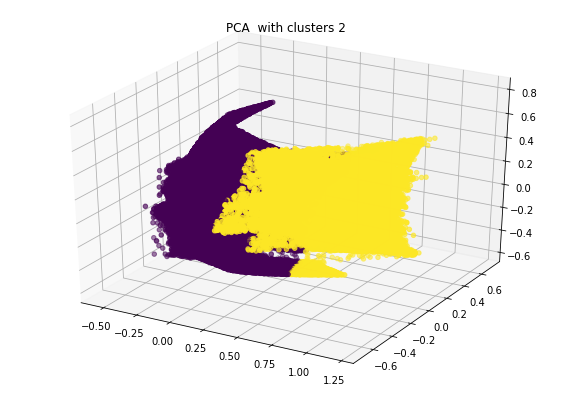

######################## PLANE ######################


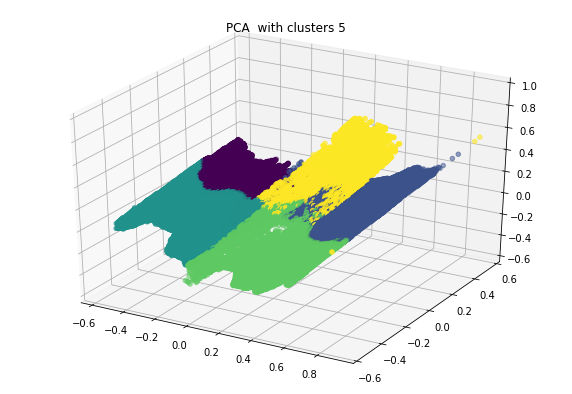

In [13]:
print('######################## BIRD #######################')
tsne_km_clustering(tsne_df_bird,2)
print('######################## PLANE ######################')
tsne_km_clustering(tsne_df_plane,4)
print('######################## BIRD #######################')
pca_km_clustering(pc_df_bird,2)
print('######################## PLANE ######################')
pca_km_clustering(pc_df_palne,5)

# **GMM Clustering**

In [0]:
def gmm(picture, k):
  picture = picture.sample(frac =.25, random_state = 1021)
  gmm = GaussianMixture(n_components=k, covariance_type='full').fit(picture)
  labels = gmm.predict(picture)
  ch = calinski_harabasz_score(picture, labels)
  sh = silhouette_score(picture, labels)
  plt.scatter(picture.iloc[:, 1], -picture.iloc[:, 0],c=labels ,s=50, cmap='viridis')
  plt.title('GMM with clusters: {} \n ch-score: {} \n sh-score: {}'.format(k,round(ch,2), round(sh,2)))
  plt.axis('off')

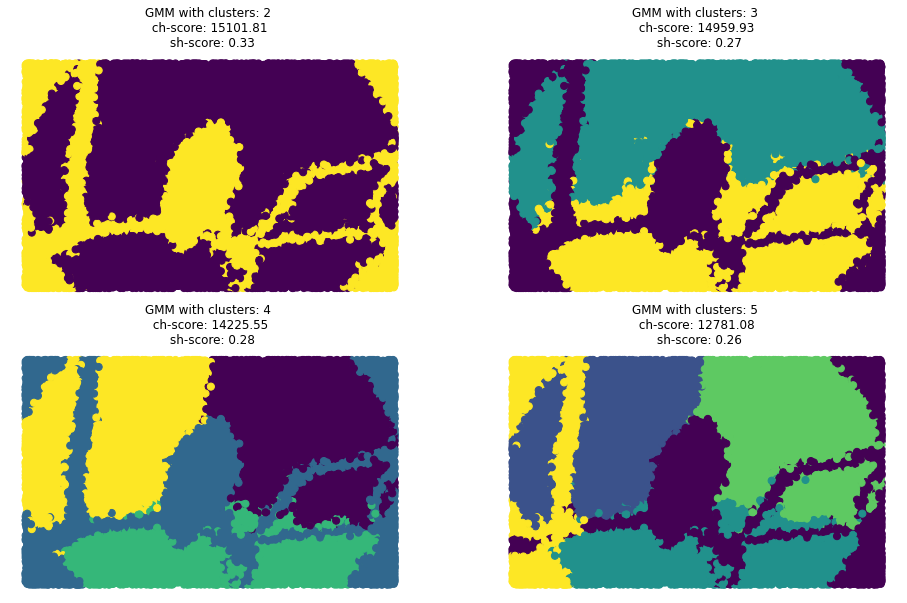

In [15]:
fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
gmm(bird,2)

plt.subplot(2, 2, 2)
gmm(bird,3)

plt.subplot(2, 2, 3)
gmm(bird,4)

plt.subplot(2, 2, 4)
gmm(bird,5)

plt.show()

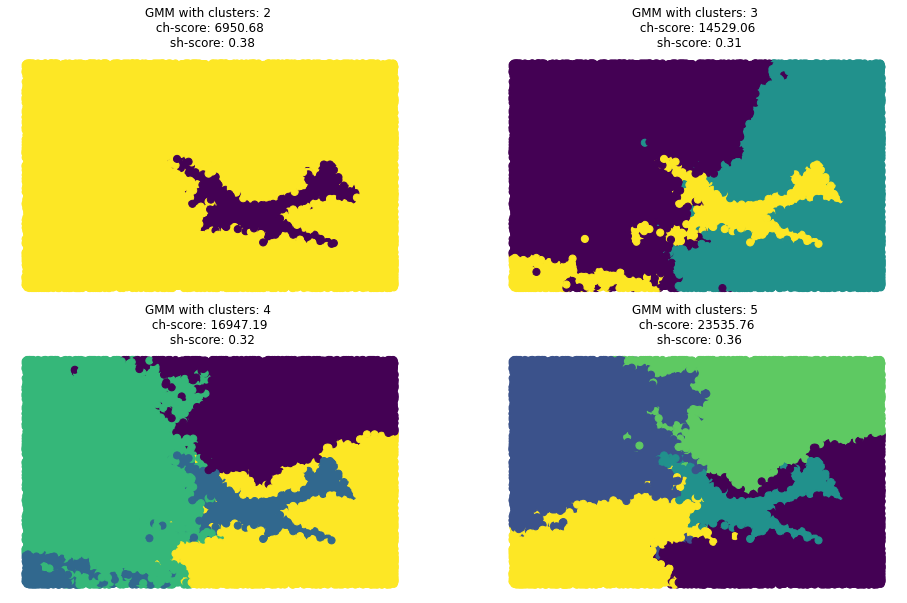

In [16]:

fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
gmm(plane,2)

plt.subplot(2, 2, 2)
gmm(plane,3)

plt.subplot(2, 2, 3)
gmm(plane,4)

plt.subplot(2, 2, 4)
gmm(plane,5)

plt.show()

In GMM, <br>
For Bird, 2 clusters resulting in good segmentation <br>
For Plane, 2 clusters resulting in good segmentation<br>

In [0]:
def tsne_gmm_clustering(picture,k):
  gmm = GaussianMixture(n_components=k, covariance_type='full').fit(picture)
  labels = gmm.predict(picture)
  g = sns.scatterplot(
      x="TSNE1", y="TSNE2",
      data=picture,
      alpha=0.3,  
      hue = labels
  )
  g.legend_.remove()
  plt.title('TSNE  with clusters {}'.format(k))
  plt.show()
def pca_gmm_clustering(picture, k):
  gmm = GaussianMixture(n_components=k, covariance_type='full').fit(picture)
  labels = gmm.predict(picture)
  ax = plt.figure(figsize=(10,7)).gca(projection='3d')
  ax.scatter(
    xs=picture['PC1'], 
    ys=picture['PC2'] , 
    zs=picture['PC3'], 
    
    c= labels

  )
  plt.title('PCA  with clusters {}'.format(k))
  plt.show()


########################## BIRD #############################


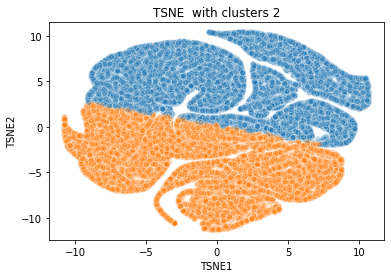

########################## PLANE ############################


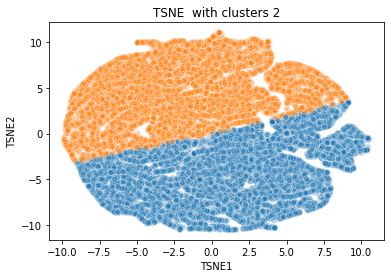

########################## BIRD #############################


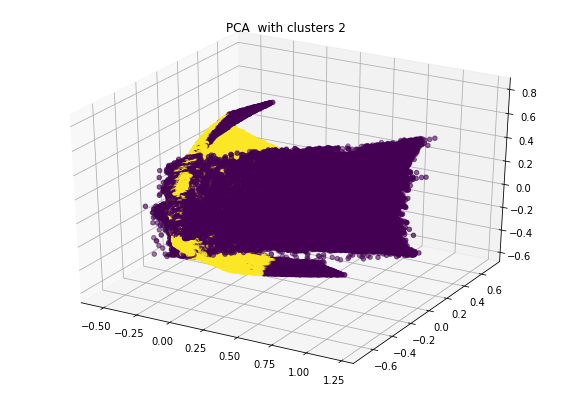

########################## PLANE ############################


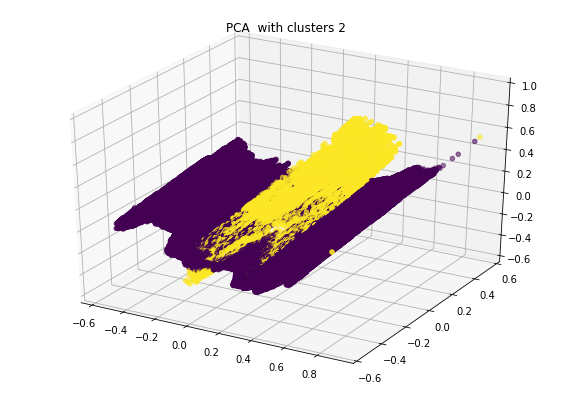

In [25]:
print('########################## BIRD #############################')
tsne_gmm_clustering(tsne_df_bird,2)
print('########################## PLANE ############################')
tsne_gmm_clustering(tsne_df_plane,2)
print('########################## BIRD #############################')
pca_gmm_clustering(pc_df_bird,2)
print('########################## PLANE ############################')
pca_gmm_clustering(pc_df_palne,2)

# **Hiearrchial Clustering**

In [0]:
def agg(picture,k):
  picture = picture.sample(frac =.25, random_state = 1021)
  model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  model.fit(picture)
  labels = model.labels_
  ch = calinski_harabasz_score(picture, labels)
  sh = silhouette_score(picture, labels)
  plt.scatter(picture.iloc[:, 1], -picture.iloc[:, 0],c=labels ,s=50, cmap='viridis')
  plt.title('Hierracheal Clustering with clusters: {} \n ch-score: {} \n sh-score: {}'.format(k,round(ch,2), round(sh,2)))
  plt.axis('off')

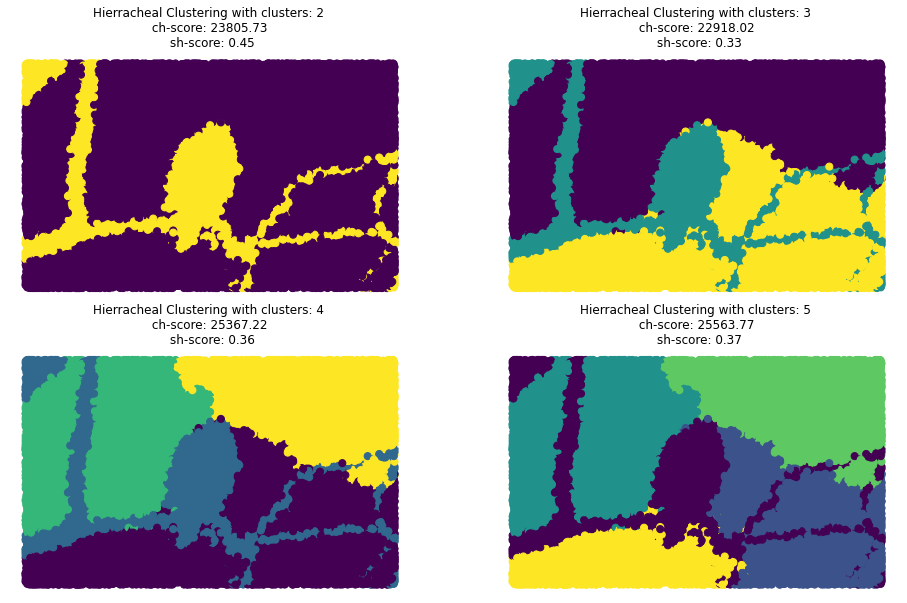

In [20]:
fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
agg(bird,2)

plt.subplot(2, 2, 2)
agg(bird,3)

plt.subplot(2, 2, 3)
agg(bird,4)

plt.subplot(2, 2, 4)
agg(bird,5)

plt.show()

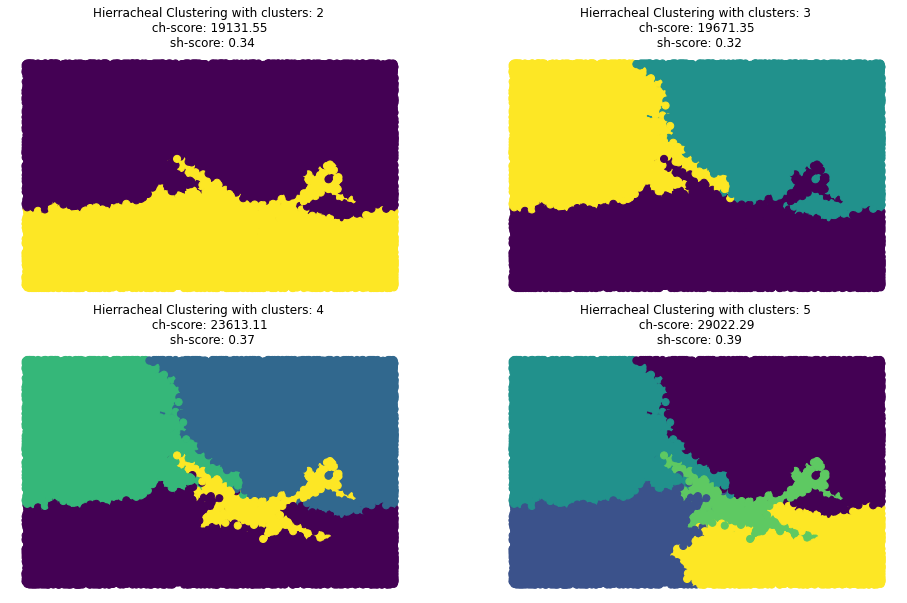

In [113]:

fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
agg(plane,2)

plt.subplot(2, 2, 2)
agg(plane,3)

plt.subplot(2, 2, 3)
agg(plane,4)

plt.subplot(2, 2, 4)
agg(plane,5)

plt.show()

In Hiearrchial Clustering, <br>
For Bird, 2 clusters resulting in good segmentation <br>
For Plane, 5 clusters resulting in good segmentation<br>

In [0]:
 def tsne_agg_clustering(picture,k):
  model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
  model.fit(picture)
  labels = model.labels_
  g = sns.scatterplot(
      x="TSNE1", y="TSNE2",
      data=picture,
      alpha=0.3,  
      hue = labels
  )
  g.legend_.remove()
  plt.title('TSNE  with clusters {}'.format(k))
  plt.show()
def pca_agg_clustering(picture, k):
  gmm = GaussianMixture(n_components=k, covariance_type='full').fit(picture)
  labels = gmm.predict(picture)
  ax = plt.figure(figsize=(10,7)).gca(projection='3d')
  ax.scatter(
    xs=picture['PC1'], 
    ys=picture['PC2'] , 
    zs=picture['PC3'], 
    
    c= labels

  )
  plt.title('PCA  with clusters {}'.format(k))
  plt.show()


######################BIRD#######################


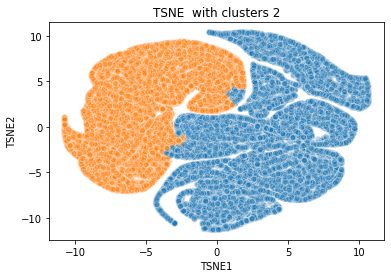

######################PLANE######################


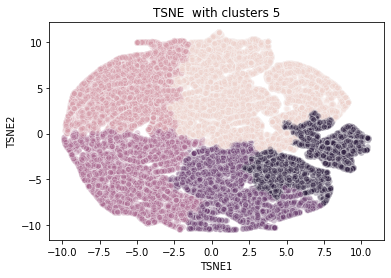

######################BIRD#######################


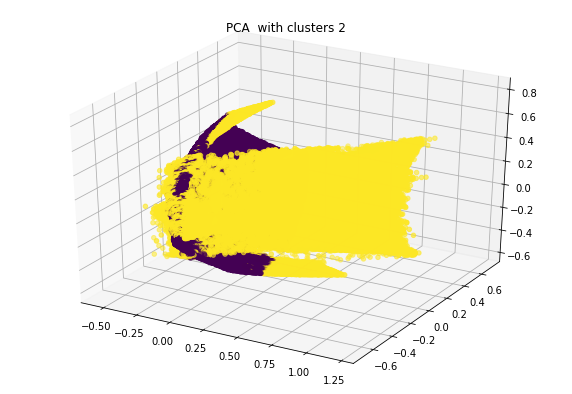

######################PLANE######################


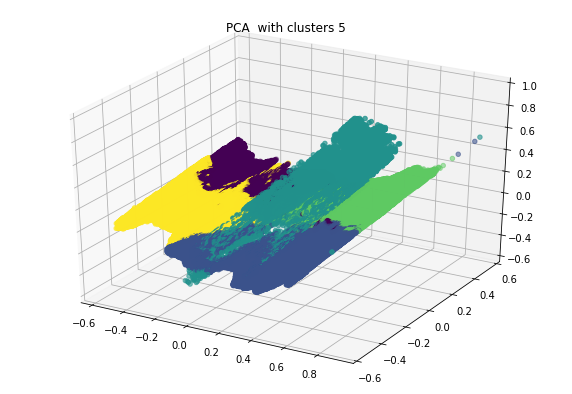

In [23]:
print("######################BIRD#######################")
tsne_agg_clustering(tsne_df_bird,2)
print("######################PLANE######################")
tsne_agg_clustering(tsne_df_plane,5)
print("######################BIRD#######################")
pca_agg_clustering(pc_df_bird,2)
print("######################PLANE######################")
pca_agg_clustering(pc_df_palne,5)